In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings 
warnings.filterwarnings('ignore')

In [146]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
nltk.download('punkt')
nltk.download('vader_lexicon')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\MS\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\MS\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\MS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
os.getcwd()

'F:\\ff_capstone'

In [4]:
data = pd.read_csv('F:\\ff_capstone/AI_Human.csv')

In [5]:
data.shape

(487235, 2)

In [6]:
data.head(2)

text  generated
0  Cars. Cars have been around since they became ...        0.0
1  Transportation is a large necessity in most co...        0.0

In [7]:
data[data.generated==0].shape

(305797, 2)

In [8]:
data[data.generated==1].shape

(181438, 2)

## Checking the distribution of the target variable

In [9]:
data.generated.value_counts(normalize=True)

0.0    0.627617
1.0    0.372383
Name: generated, dtype: float64

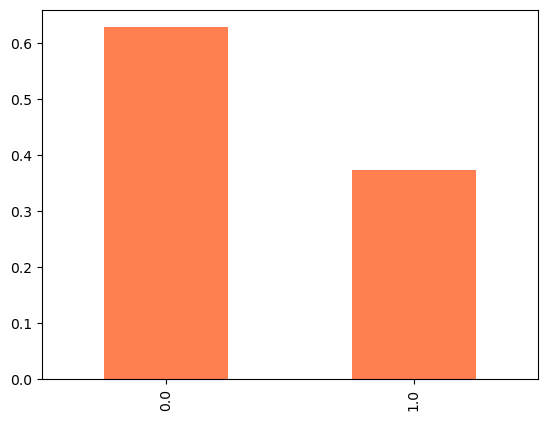

In [10]:
data.generated.value_counts(normalize=True).plot(kind='bar',color='coral')
plt.show()

### As The Data is imbalanced so just dropping some data to make the dataset balanced for both the categories

In [13]:
data_h = data[data.generated==0][:20000]

In [12]:
data_a = data[data.generated==1][:20000]

In [14]:
final_df = pd.concat([data_a,data_h],axis=0,ignore_index=True)

In [17]:
#final_df.to_csv('text_small.csv')

In [15]:
final_df.shape

(40000, 2)

In [18]:
final_df.head(2)

text  generated
0  This essay will analyze, discuss and prove one...        1.0
1  I strongly believe that the Electoral College ...        1.0

In [19]:
final_df.generated.value_counts(normalize=True)

1.0    0.5
0.0    0.5
Name: generated, dtype: float64

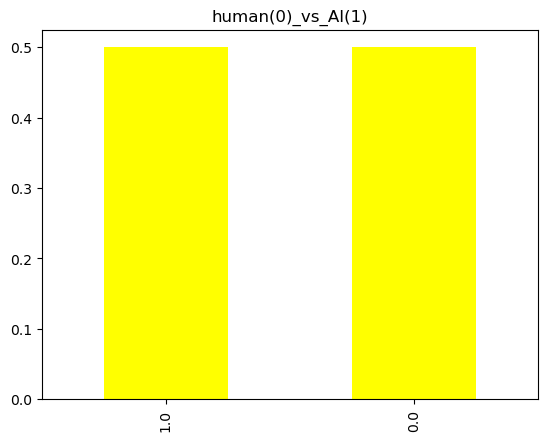

In [21]:
final_df.generated.value_counts(normalize=True).plot(kind='bar',color='yellow')
plt.title('human(0)_vs_AI(1)')
plt.show()

### Adding features

In [22]:
# Here adding the total count of the charecters used in the text
final_df['char_len'] = final_df.text.apply(len)

In [23]:
# Here adding the total words used in each sentence
final_df['word_len'] = final_df.text.apply(lambda x: len(str(x).split()))

In [27]:
# Here adding the total sentences used in each sentence
final_df['sent_len'] = final_df.text.apply(lambda x: len(str(x).split('. ')))

In [25]:
# checking a text
print(final_df.text[3717])


I strongly believe that a positive attitude is the key to success in life. I have seen this principle in action many times. For example, when I was in university, I was struggling with a difficult assignment. At first, I had a negative attitude and was convinced I could not complete it. By taking a step back and focusing on the positive aspects of the task, I was eventually able to finish it. My success was a direct result of my changing attitude.

Another example is my friend who was unemployed for a long time. He became increasingly discouraged, but he eventually decided to change his attitude and stay positive. He made new contacts, revised his resume, and started to actively search for new opportunities. Soon enough, he landed a great job at a company he really wanted to work for.

Finally, when I was running my first marathon, I was determined to finish it but I was so exhausted by the middle of the race that I thought it was impossible. By maintaining a positive mindset, I was a

In [31]:
# paragraph count
final_df['para_len'] = final_df.text.apply(lambda x: len(str(x).split('\n\n')))

In [34]:
final_df.para_len[3717]   #just to crosscheck the split

4

In [35]:
final_df.head(2)

text  generated  char_len  \
0  This essay will analyze, discuss and prove one...        1.0      1356   
1  I strongly believe that the Electoral College ...        1.0      1500   

   word_len  sent_len  para_len  
0       235        11         1  
1       258        10         1

In [36]:
# cheking for Human generated text
final_df[final_df['generated']==0]['char_len'].describe()

count    20000.000000
mean      2415.736700
std       1071.780202
min        239.000000
25%       1629.000000
50%       2252.000000
75%       2974.250000
max      18322.000000
Name: char_len, dtype: float64

In [37]:
# cheking for AI generated text
final_df[final_df['generated']==1]['char_len'].describe()

count    20000.000000
mean      2222.074650
std        805.896995
min          1.000000
25%       1695.000000
50%       2242.000000
75%       2757.000000
max       5626.000000
Name: char_len, dtype: float64

In [38]:
# as we can see that there is a huge gap between 75% and max so we are cheking whether we only have few
# data which has huge text in it

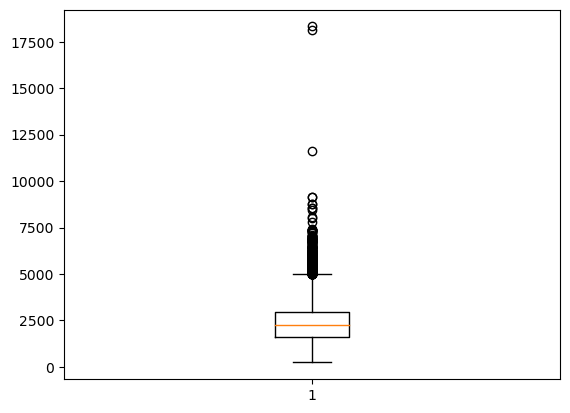

In [39]:
a = final_df[final_df['generated']==0]['char_len']
plt.boxplot(x=a)
plt.show()

In [40]:
# it shows that their are few text which contain alot of charecters

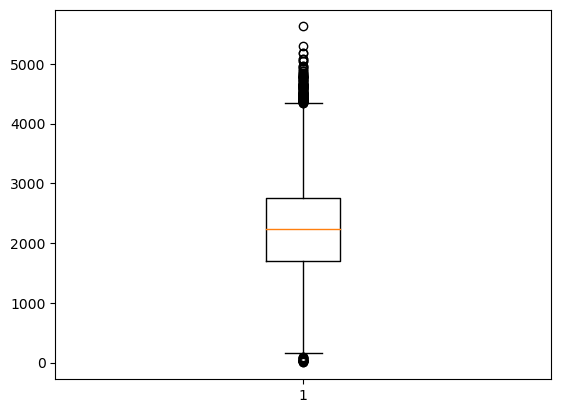

In [41]:
a = final_df[final_df['generated']==1]['char_len']
plt.boxplot(x=a)
plt.show()

In [45]:
# in class 1 (human) there is not that much extreme use of very lengthy text

## let's visualise them and see we can find some insights


In [43]:
# Lets set the theme of the plot
sns.set_style('whitegrid')
plt.style.use('seaborn-v0_8-paper')

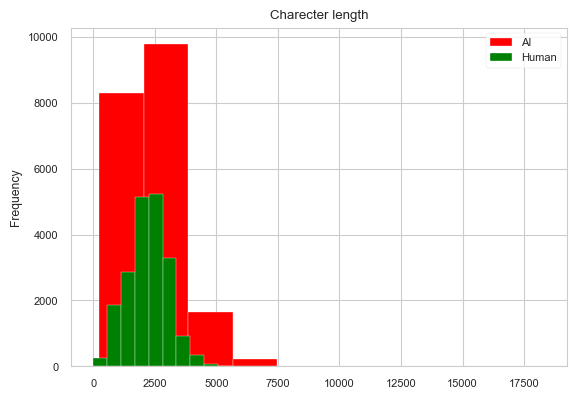

In [44]:
# Plotting the character length
final_df[final_df['generated']==0]['char_len'].plot(kind='hist',color='red',label='AI')
final_df[final_df['generated']==1]['char_len'].plot(kind='hist',color='green',label='Human')
plt.legend()
plt.title('Charecter length')
plt.show()

In [51]:
# character used by humans are less than ai

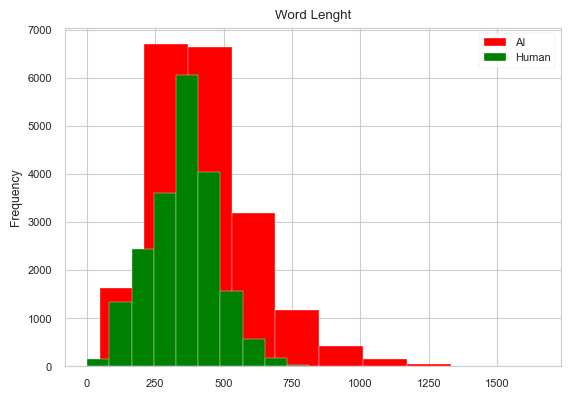

In [46]:
# Plotting the word length
final_df[final_df['generated']==0]['word_len'].plot(kind='hist',color='red',label='AI')
final_df[final_df['generated']==1]['word_len'].plot(kind='hist',color='green',label='Human')
plt.legend()
plt.title('Word Lenght')
plt.show()

In [52]:
# words used by humans are less than AI

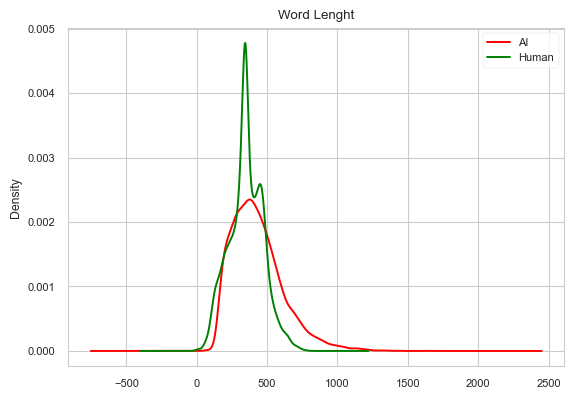

In [47]:
# Plotting the word length distribution
final_df[final_df['generated']==0]['word_len'].plot(kind='kde',color='red',label='AI')
final_df[final_df['generated']==1]['word_len'].plot(kind='kde',color='green',label='Human')
plt.legend()
plt.title('Word Lenght')
plt.show()

In [48]:
# Checking the skewness and kurtosis
print('Skewness of the column is :',final_df[final_df['generated']==0]['word_len'].skew())

print('Kurtosis of the column is :',final_df[final_df['generated']==1]['word_len'].kurt())

Skewness of the column is : 1.0886475493690049
Kurtosis of the column is : -0.0182251000975997


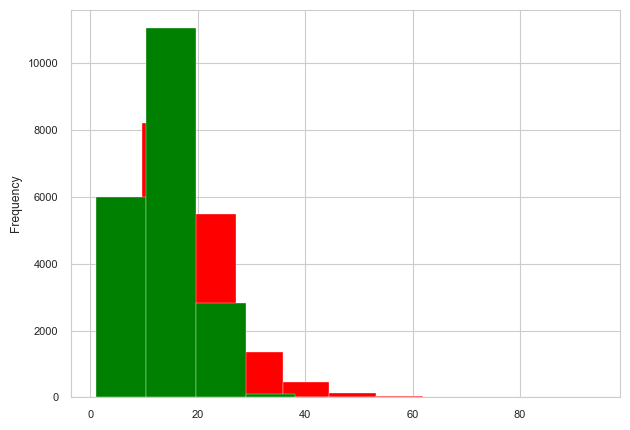

In [49]:
# Plotting the sentence length
final_df[final_df['generated']==0]['sent_len'].plot(kind='hist',color='red',label='AI')
final_df[final_df['generated']==1]['sent_len'].plot(kind='hist',color='green',label='Human')
plt.tight_layout()
plt.show()

In [50]:
# sentence length of human is less but at some point its exceeding A.I in term of sentences used

## Features to distinguish both the classes more clearly

In [54]:
# getting count of punctuations used

In [55]:
def punc(text):

    text = re.findall('[^a-zA-Z0-9]+',text)
    return len(text)

In [57]:
final_df['punc_count'] = final_df.text.apply(punc)   # here we get the frequency of special characters used
final_df['punc_count']

0        237
1        259
2        290
3        598
4        532
        ... 
39995    747
39996    405
39997    415
39998    567
39999    450
Name: punc_count, Length: 40000, dtype: int64

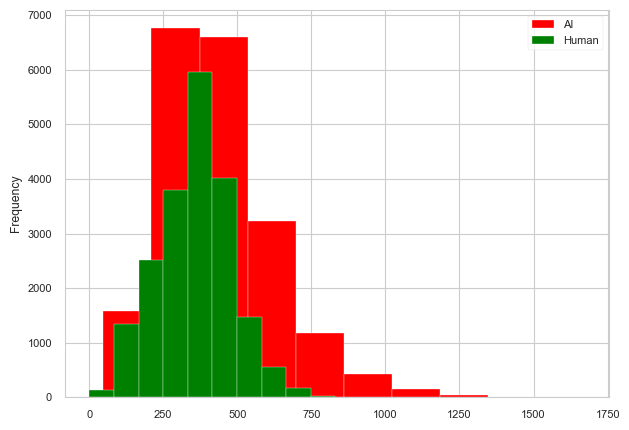

In [69]:
# Plotting the punctuation count
final_df[final_df['generated']==0]['punc_count'].plot(kind='hist',color='red',label='AI')
final_df[final_df['generated']==1]['punc_count'].plot(kind='hist',color='green',label='Human')
plt.legend()
plt.tight_layout()
plt.show()

In [70]:
# use of punctuation count is higher in AI as compared to Human

In [58]:
# frequency of numbers used
def num(text):

    text = re.findall('\d',text)
    return len(text)

In [59]:
final_df['numeric_count'] = final_df.text.apply(num)   # here we get the frequency of numbers used
final_df['numeric_count']

0         0
1        10
2         0
3         0
4         0
         ..
39995     0
39996     0
39997     0
39998     0
39999     0
Name: numeric_count, Length: 40000, dtype: int64

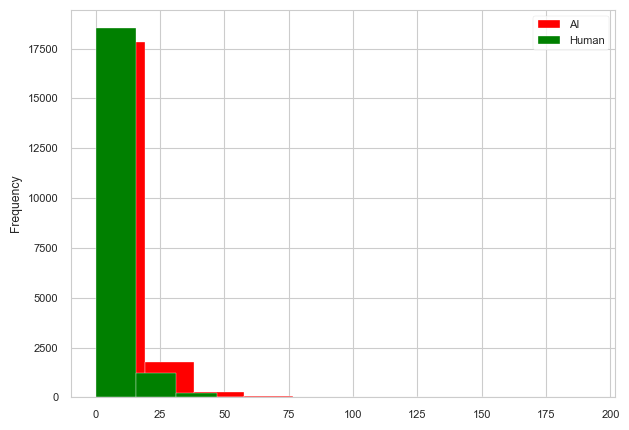

In [71]:
# Plotting the numbers used
final_df[final_df['generated']==0]['numeric_count'].plot(kind='hist',color='red',label='AI')
final_df[final_df['generated']==1]['numeric_count'].plot(kind='hist',color='green',label='Human')
plt.legend()
plt.tight_layout()
plt.show()

In [72]:
# AI has slightly higher counts of numbers used in their text than humans

In [61]:
# stopwords frequency
stp = stopwords.words('english')
def count_stopwords_frequency(text):
    stopwords = set(stp)
    words = text.split()
    stopwords_frequency = sum(1 for word in words if word.lower() in stopwords)
    return stopwords_frequency

In [63]:
final_df['stopword_freq'] = final_df.text.apply(count_stopwords_frequency)

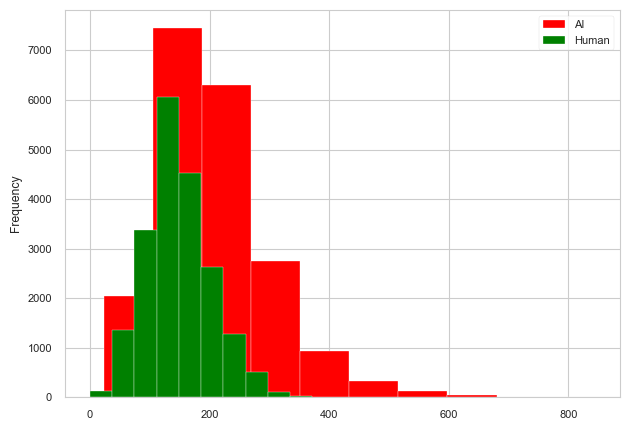

In [67]:
# Plotting the stopword freq
final_df[final_df['generated']==0]['stopword_freq'].plot(kind='hist',color='red',label='AI')
final_df[final_df['generated']==1]['stopword_freq'].plot(kind='hist',color='green',label='Human')
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# stopwords in AI have used much more than human

In [74]:
num_cols = final_df.select_dtypes(include=np.number)

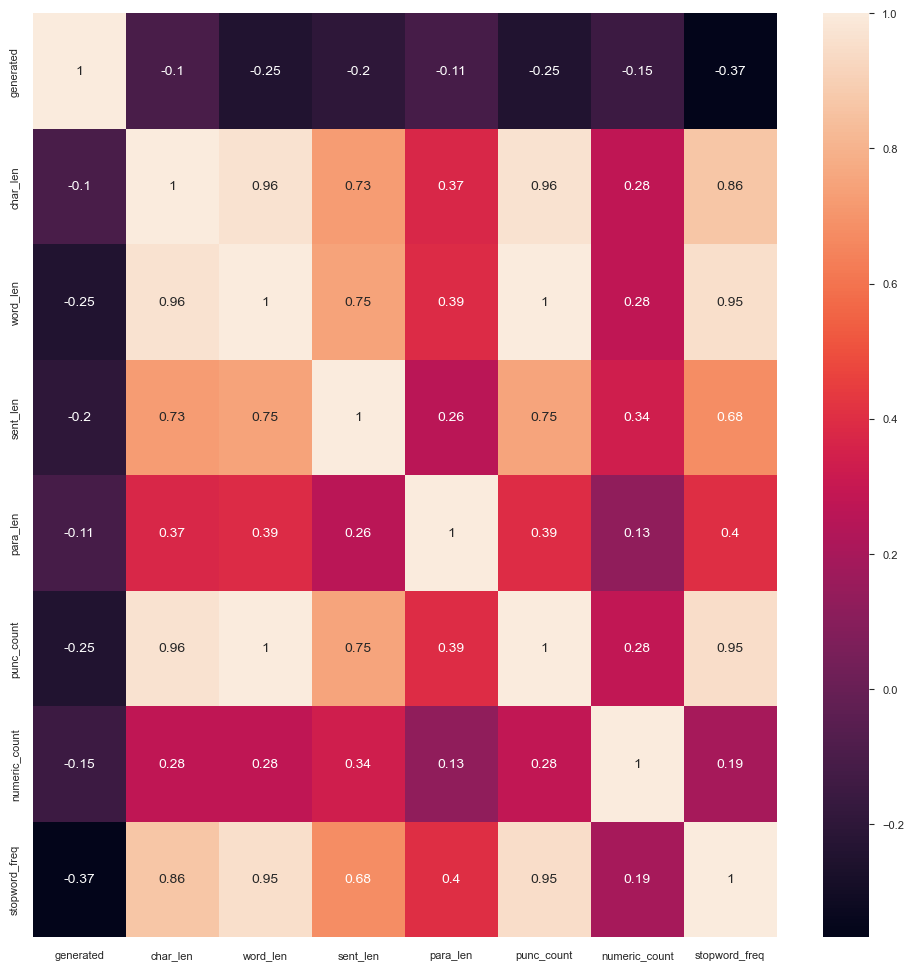

In [75]:
plt.figure(figsize=(12,12))
sns.heatmap(num_cols.corr(),annot=True)
plt.show()

### Lets clean the text 

In [76]:
# the function to clean the text as we have plain text so we don't have to do extensive cleaning

def clean_text(text):
    text = re.sub('[^a-zA-Z0-9]'," ",text) # removes special characters
    text = re.sub('\d+'," ",text) #removes digits
    text = re.sub('\s+'," ",text).strip()  # removes extra white spaces
    return text

In [77]:
final_df['clean_text'] = final_df.text.apply(clean_text)

In [78]:
final_df.head(2)

text  generated  char_len  \
0  This essay will analyze, discuss and prove one...        1.0      1356   
1  I strongly believe that the Electoral College ...        1.0      1500   

   word_len  sent_len  para_len  punc_count  numeric_count  stopword_freq  \
0       235        11         1         237              0            119   
1       258        10         1         259             10            127   

                                          clean_text  
0  This essay will analyze discuss and prove one ...  
1  I strongly believe that the Electoral College ...

# pos Frequency to get the structure of the sentences 
#### As both kind of texts contains similar context and contents so in order to differenciate between both of them we need to check the structure of both the text  and by analyzing the stucture we can easily differenciate both the text

In [79]:
from nltk import pos_tag
from collections import Counter

In [80]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\MS\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [81]:
def pos_frequency(text):
    words = text.split()
    pos_tags = pos_tag(words)
    pos_tag_freq = Counter(tag for word, tag in pos_tags)
    return pos_tag_freq

In [82]:
important_pos_tags = ['NN', 'PRP', 'VB', 'JJ', 'RB', 'IN', 'DT', 'CC', 'CD', 'TO']
for i in important_pos_tags:
    final_df[i] = final_df['clean_text'].apply(lambda x: pos_frequency(x).get(i, 0))

In [83]:
final_df.head(2)

text  generated  char_len  \
0  This essay will analyze, discuss and prove one...        1.0      1356   
1  I strongly believe that the Electoral College ...        1.0      1500   

   word_len  sent_len  para_len  punc_count  numeric_count  stopword_freq  \
0       235        11         1         237              0            119   
1       258        10         1         259             10            127   

                                          clean_text  NN  PRP  VB  JJ  RB  IN  \
0  This essay will analyze discuss and prove one ...  32    4  14  11  10  32   
1  I strongly believe that the Electoral College ...  38    5  13  14  15  36   

   DT  CC  CD  TO  
0  30   3   5   8  
1  49   7   2   5

In [84]:
#final_df.to_csv('text_pos.csv')

In [85]:
final_df.shape

(40000, 20)

### getting count of spelling errors

In [86]:
from textblob import TextBlob

In [87]:
def count_misspelled_words(text):
    blob = TextBlob(text)
    corrected_words = blob.correct().words
    misspelled_count = sum(1 for word, corrected_word in zip(blob.words, corrected_words) if word != corrected_word)
    return misspelled_count

In [88]:
#sm_df['freq_misspelled'] = sm_df['clean_text'].apply(count_misspelled_words)
# heavy apply
final_df.clean_text[:5].apply(count_misspelled_words)

0     3
1     8
2     8
3    34
4    30
Name: clean_text, dtype: int64

## getting the count of gramatical errors

In [89]:
import requests

In [90]:
def count_grammar_mistakes(text):
    # LanguageTool API endpoint
    url = 'https://languagetool.org/api/v2/check'

    # Request payload
    payload = {
        'text': text,
        'language': 'en-US'
    }

    # Send POST request to LanguageTool API
    response = requests.post(url, data=payload)

    # Parse JSON response
    json_response = response.json()

    # Count the number of grammar mistakes
    mistake_count = len(json_response['matches'])

    return mistake_count

In [91]:
#final_df['freq_gram_mistakes']= final_df['text'].apply(count_grammar_mistakes)
#heavy
final_df['text'][:5].apply(count_grammar_mistakes)

0    1
1    2
2    5
3    5
4    3
Name: text, dtype: int64

## converting text into numbers Using tf-idf
#### Adding all the features that i have extracted to distinguish both classes with tf-idf vectors and making final Training data

In [93]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [94]:
tf = TfidfVectorizer(max_features=2000)
tf_text = pd.DataFrame(tf.fit_transform(final_df.clean_text).toarray(),columns=tf.get_feature_names_out())

In [95]:
numerical_data = final_df.drop(columns=['text','generated','clean_text'], axis=1)

In [97]:
numerical_data.shape,tf_text.shape

((40000, 17), (40000, 2000))

In [98]:
final_x = final_x = pd.concat([tf_text,numerical_data],axis=1)
final_x

abilities   ability      able  abolish  abolished  abolishing  \
0       0.000000  0.000000  0.000000      0.0        0.0         0.0   
1       0.000000  0.000000  0.000000      0.0        0.0         0.0   
2       0.000000  0.000000  0.000000      0.0        0.0         0.0   
3       0.000000  0.000000  0.000000      0.0        0.0         0.0   
4       0.000000  0.000000  0.000000      0.0        0.0         0.0   
...          ...       ...       ...      ...        ...         ...   
39995   0.000000  0.000000  0.000000      0.0        0.0         0.0   
39996   0.142992  0.000000  0.000000      0.0        0.0         0.0   
39997   0.000000  0.000000  0.000000      0.0        0.0         0.0   
39998   0.000000  0.026111  0.018290      0.0        0.0         0.0   
39999   0.000000  0.000000  0.037942      0.0        0.0         0.0   

          about  above  academic  access  ...   NN  PRP  VB  JJ  RB   IN  DT  \
0      0.000000    0.0  0.000000     0.0  ...   32    4  14  11  10   32  30   
1      0.000000    0.0  0.000000     0.0  ...   38    5  13  14  15   36  49   
2      0.028940    0.0  0.000000     0.0  ...   48    6   9  22  29   28  19   
3      0.011889    0.0  0.000000     0.0  ...  117    3  23  81  11   64  46   
4      0.000000    0.0  0.000000     0.0  ...  109    3  15  83  11   53  36   
...         ...    ...       ...     ...  ...  ...  ...  ..  ..  ..  ...  ..   
39995  0.010603    0.0  0.000000     0.0  ...  130   19  57  60  32  104  56   
39996  0.016450    0.0  0.000000     0.0  ...   67   25  31  25  13   51  31   
39997  0.015212    0.0  0.038568     0.0  ...   77    9  31  26  14   50  38   
39998  0.000000    0.0  0.031348     0.0  ...  111    7  23  52  35   60  58   
39999  0.000000    0.0  0.000000     0.0  ...   42   23  47  21  10   61  20   

       CC  CD  TO  
0       3   5   8  
1       7   2   5  
2      10   0   5  
3      38   0  18  
4      32   0   9  
...    ..  ..  ..  
39995  28   0  30  
39996  16   4  10  
39997  12   0  10  
39998   8   1  25  
39999  12   2  22  

[40000 rows x 2017 columns]

In [99]:
y = final_df.generated

### train test split

In [101]:
from sklearn.model_selection import train_test_split

In [102]:
xtrain,xtest,ytrain,ytest = train_test_split(final_x,y,test_size=0.2)

## Building the model

In [113]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report

In [132]:
from sklearn.metrics import f1_score,precision_score,recall_score,roc_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier,AdaBoostClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

### Checking all the models 

In [109]:
def model(model,xtrain,xtest,ytrain,ytest):
    m = model()
    pred = m.fit(xtrain,ytrain).predict(xtest)
    print(classification_report(ytest,pred))
    print()
    print('F1_score is :',f1_score(ytest,pred))

In [116]:
# checking with Logistic Regression
model(LogisticRegression,xtrain,xtest,ytrain,ytest)

              precision    recall  f1-score   support

         0.0       0.84      0.90      0.87      3943
         1.0       0.89      0.84      0.87      4057

    accuracy                           0.87      8000
   macro avg       0.87      0.87      0.87      8000
weighted avg       0.87      0.87      0.87      8000


F1_score is : 0.86555795353561


In [111]:
# checking with Descision tree
model(DecisionTreeClassifier,xtrain,xtest,ytrain,ytest)

              precision    recall  f1-score   support

         0.0       0.94      0.95      0.95      3943
         1.0       0.95      0.94      0.95      4057

    accuracy                           0.95      8000
   macro avg       0.95      0.95      0.95      8000
weighted avg       0.95      0.95      0.95      8000


F1_score is : 0.9488291413703382


In [110]:
# checking with Adaboost
model(AdaBoostClassifier,xtrain,xtest,ytrain,ytest)

              precision    recall  f1-score   support

         0.0       0.97      0.96      0.97      3943
         1.0       0.96      0.97      0.97      4057

    accuracy                           0.97      8000
   macro avg       0.97      0.97      0.97      8000
weighted avg       0.97      0.97      0.97      8000


F1_score is : 0.9668059995082371


In [118]:
# checking with GradientBoosting
model(GradientBoostingClassifier,xtrain,xtest,ytrain,ytest)

              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98      3943
         1.0       0.98      0.98      0.98      4057

    accuracy                           0.98      8000
   macro avg       0.98      0.98      0.98      8000
weighted avg       0.98      0.98      0.98      8000


F1_score is : 0.9798441943860516


In [133]:
# taking Gradientboosting as the final model and also lowering the complexity to prevent overfitting

In [123]:
gb = GradientBoostingClassifier(n_estimators=50,min_samples_split=3)

In [125]:
gb.fit(xtrain,ytrain)

GradientBoostingClassifier(min_samples_split=3, n_estimators=50)

In [126]:
pred = gb.predict(xtest)

In [134]:
print(classification_report(ytest,pred))
print('test_f1_score :',f1_score(ytest,pred))
print('test_recall_score :',recall_score(ytest,pred))
print('test_precision_score :',precision_score(ytest,pred))

              precision    recall  f1-score   support

         0.0       0.97      0.97      0.97      3943
         1.0       0.97      0.97      0.97      4057

    accuracy                           0.97      8000
   macro avg       0.97      0.97      0.97      8000
weighted avg       0.97      0.97      0.97      8000

test_f1_score : 0.9682833518449957
test_recall_score : 0.966970667981267
test_precision_score : 0.9695996045477014


In [130]:
pred_t = gb.predict(xtrain)

In [135]:
print('Train_f1_score :',f1_score(ytrain,pred_t))
print('Train_Recall_score :',recall_score(ytrain,pred_t))
print('Train_precision_score :',precision_score(ytrain,pred_t))

Train_f1_score : 0.9709342560553632
Train_Recall_score : 0.9680110393276046
Train_precision_score : 0.9738751814223512


In [136]:
# so it is a good fitted model as the train and test metrics are very close

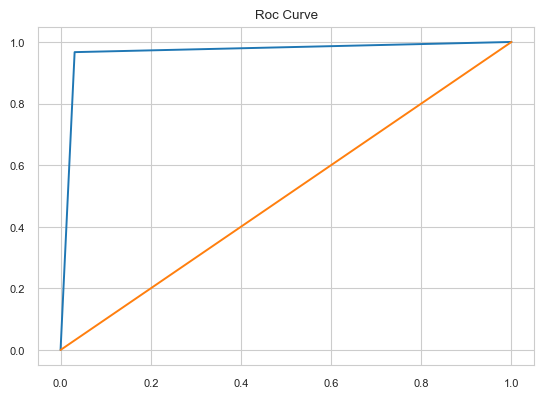

In [144]:
fpr,tpr,_ = roc_curve(ytest,pred)
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1])
plt.title('Roc Curve')
plt.show()

# ART/ IMAGES CLASSIFICATION OF HUMAN & A.I

In [1]:
import tensorflow as tf
from tensorflow import keras
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from keras import layers
from keras.models import Sequential
from keras.layers import Dense,Dropout,BatchNormalization,Conv2D,MaxPooling2D,Flatten

In [3]:
# getting the train data 

In [4]:
os.getcwd()

'F:\\ff_capstone'

In [3]:
train_ds = keras.preprocessing.image_dataset_from_directory(directory='F:\\ff_capstone\\train')

Found 791 files belonging to 2 classes.


In [4]:
test_ds = keras.preprocessing.image_dataset_from_directory(directory='F:\\ff_capstone\\test')

Found 180 files belonging to 2 classes.


In [8]:
class_names = train_ds.class_names
print(class_names)

['AiArtData', 'RealArt']


In [9]:
for images,labels in train_ds.take(1):
    print('size of each batch is :', len(labels))
    print('Images in each batch is :',len(images))

size of each batch is : 32
Images in each batch is : 32


# checking for data imbalance

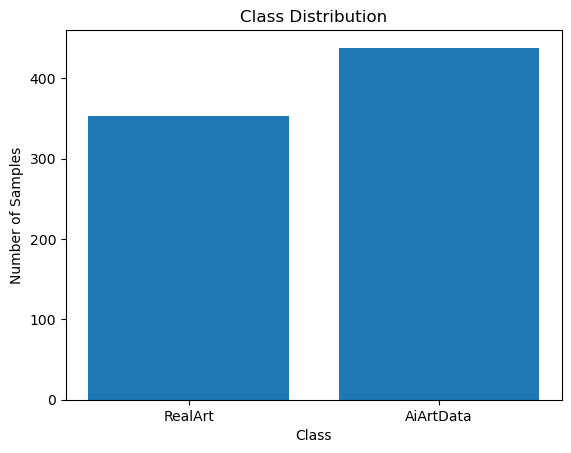

RealArt: 353 samples (44.63% of total)
AiArtData: 438 samples (55.37% of total)


In [10]:
# Count samples in each class
class_counts = {}
for images, labels in train_ds:
    for label in labels:
        class_name = class_names[label.numpy()]
        if class_name in class_counts:
            class_counts[class_name] += 1
        else:
            class_counts[class_name] = 1

# Visualize class distribution
plt.bar(class_counts.keys(), class_counts.values())
plt.xlabel('Class')
plt.ylabel('Number of Samples')
plt.title('Class Distribution')
plt.show()

# Check for imbalance
total_samples = sum(class_counts.values())
for class_name, count in class_counts.items():
    percentage = (count / total_samples) * 100
    print(f"{class_name}: {count} samples ({percentage:.2f}% of total)")



In [11]:
class_counts

{'RealArt': 353, 'AiArtData': 438}

In [12]:
for _,labels in train_ds.take(1):
    print(labels)

tf.Tensor([0 1 0 1 0 0 0 0 1 0 1 1 1 1 1 0 0 0 1 1 0 1 0 1 0 0 0 0 1 1 1 0], shape=(32,), dtype=int32)


In [13]:
for images,labels in train_ds.take(1):
    print('shape of the images :',images.shape)
    print('shape of the labels :',labels.shape)

shape of the images : (32, 256, 256, 3)
shape of the labels : (32,)


In [15]:
class_names

['AiArtData', 'RealArt']

# plotting some images from train_ds

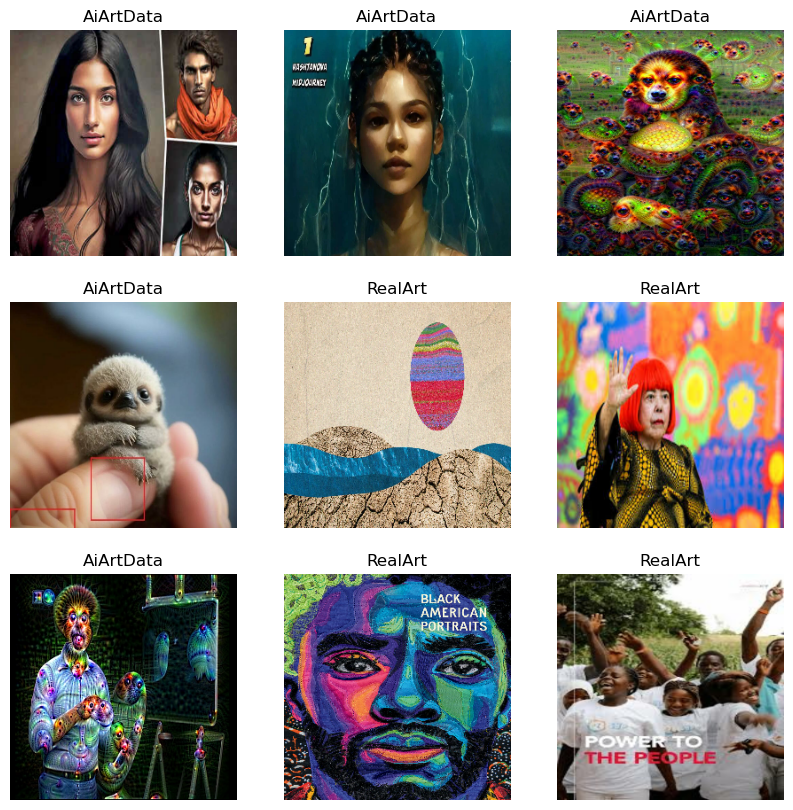

In [14]:
for images,labels in train_ds.take(1):
    plt.figure(figsize=(10,10))
    t=1
    for i in range(9):
        plt.subplot(3,3,t)
        plt.imshow(images[i].numpy().astype('uint8'))
        class_index = labels[i]
        plt.title(class_names[class_index])
        plt.axis('off')
        t+=1

# plotting Ai_art  class images 

In [16]:
def filter_dataset_by_class(dataset, class_label):
    filtered_images = []
    filtered_labels = []
    for images, labels in dataset:
        for image, label in zip(images, labels):
            if label == class_label:
                filtered_images.append(image)
                filtered_labels.append(label)
    return tf.data.Dataset.from_tensor_slices((filtered_images, filtered_labels))

In [17]:
class_0 = filter_dataset_by_class(train_ds,0)

In [18]:
for imag,lab in class_0.take(3):
    print(imag.shape)
    print(lab.numpy())

(256, 256, 3)
0
(256, 256, 3)
0
(256, 256, 3)
0


In [19]:
# as this data is made by tensor_slicer so it does not have batches . Here if i use the .take function it takes that much of
# images 

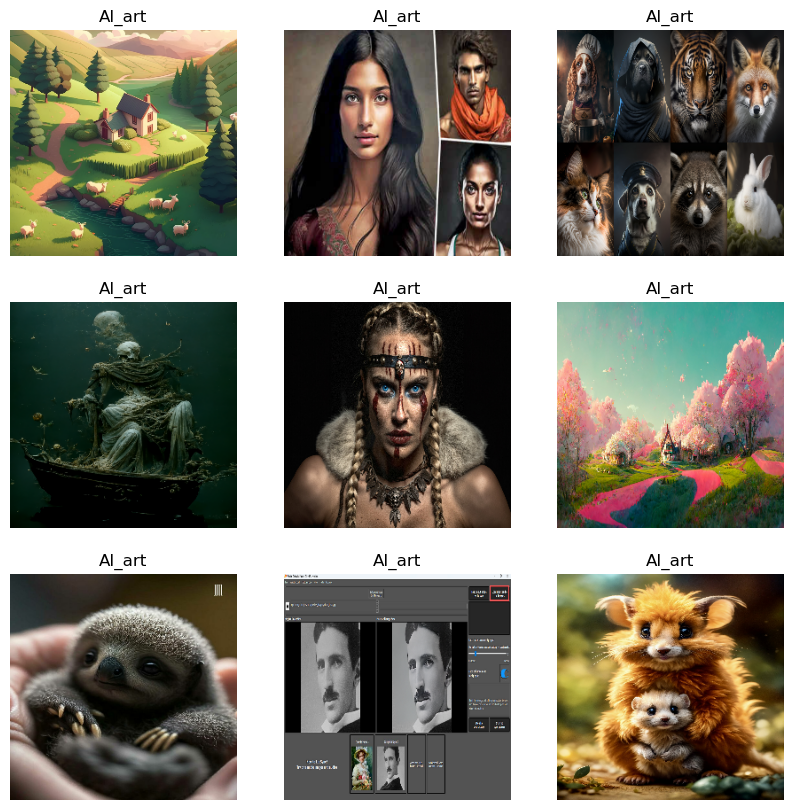

In [20]:
plt.figure(figsize=(10, 10))
for i, (image, label) in enumerate(class_0.take(9)):  # Displaying first 9 images
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(image.numpy().astype("uint8"))
    plt.title('AI_art')
    plt.axis("off")
plt.show()


# plotting Human_Art  class images 

In [21]:
class_1 = filter_dataset_by_class(train_ds,1)

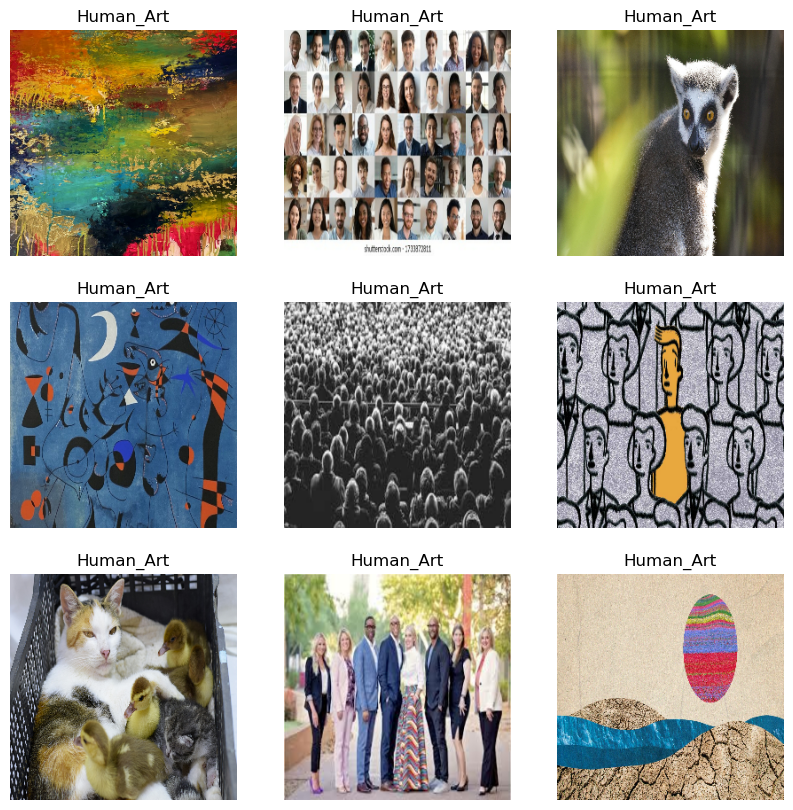

In [22]:
plt.figure(figsize=(10, 10))
for i, (image, label) in enumerate(class_1.take(9)):  # Displaying first 9 images
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(image.numpy().astype("uint8"))
    plt.title('Human_Art')
    plt.axis("off")
plt.show()


In [23]:
# analysing the pictures through pixel intensity

In [24]:
def analyze_pixel_intensity(image):
    pixel_values = image.flatten()
    plt.hist(pixel_values, bins=256, range=(0, 255), color='gray', alpha=0.7)
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')
    plt.title('Pixel Intensity Histogram for Class 0')
    plt.show()

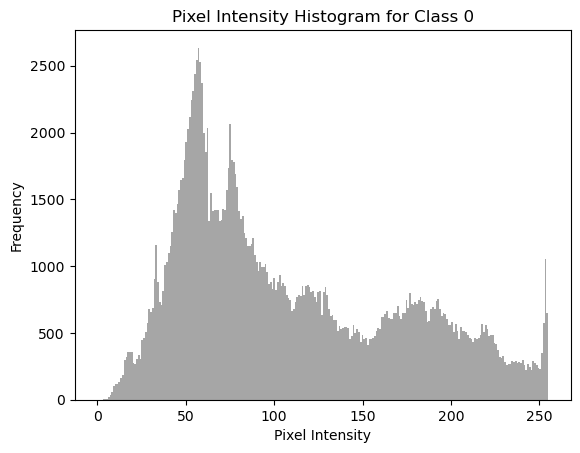

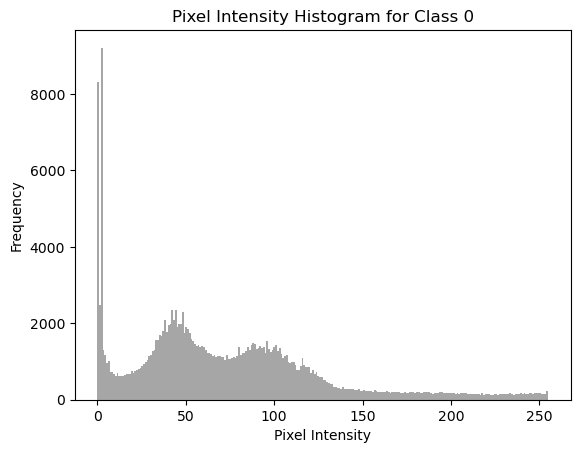

In [25]:
for image, label in class_0.take(2):
    image_array = image.numpy()  
    analyze_pixel_intensity(image_array)


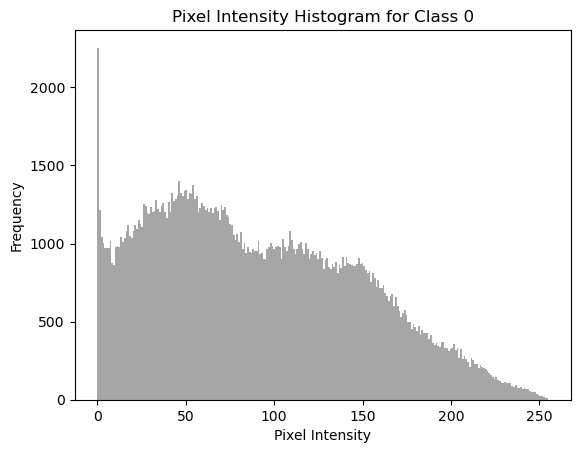

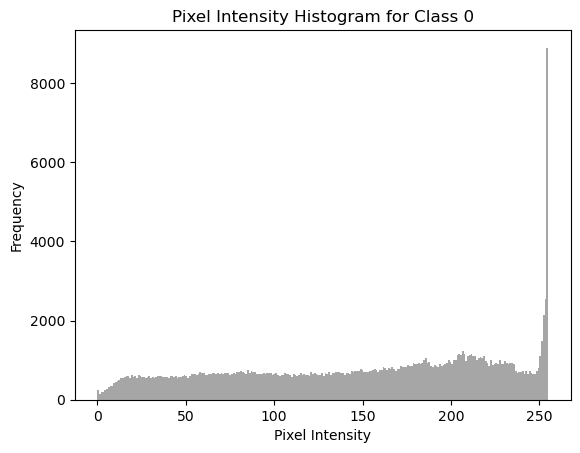

In [26]:
for image, label in class_1.take(2):
    image_array = image.numpy()  
    analyze_pixel_intensity(image_array)


# normalizing the images before training

In [28]:
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
test_ds = test_ds.map(process)

# building a CNN Binary Classification Model

In [29]:
model = Sequential()

In [30]:
model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))


model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))


model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))


In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 128)       0

In [32]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [33]:
result = model.fit(train_ds,epochs=5,validation_data=test_ds)

Epoch 1/5
25/25 [==============================] - 130s 5s/step - loss: 0.6953 - accuracy: 0.5512 - val_loss: 0.6894 - val_accuracy: 0.5444
Epoch 2/5
25/25 [==============================] - 109s 4s/step - loss: 0.6944 - accuracy: 0.5525 - val_loss: 0.6911 - val_accuracy: 0.5444
Epoch 3/5
25/25 [==============================] - 105s 4s/step - loss: 0.6909 - accuracy: 0.5537 - val_loss: 0.6900 - val_accuracy: 0.5444
Epoch 4/5
25/25 [==============================] - 105s 4s/step - loss: 0.6900 - accuracy: 0.5537 - val_loss: 0.6892 - val_accuracy: 0.5444
Epoch 5/5
25/25 [==============================] - 104s 4s/step - loss: 0.6887 - accuracy: 0.5537 - val_loss: 0.6892 - val_accuracy: 0.5444


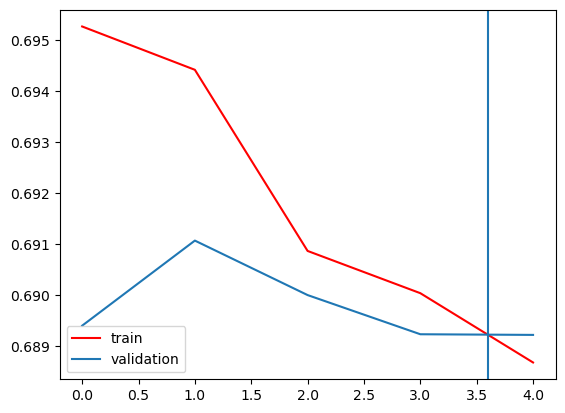

In [36]:
# checking the loss
plt.plot(result.history['loss'],color='red',label='train')
plt.plot(result.history['val_loss'],label='validation')
plt.axvline(3.6)
plt.legend()
plt.show()

In [37]:
#at this point the loss of train and validation are same 

In [44]:
# as the data was very less that's why we are getting less accuracy
# now we need to augment the data 

# Data Augmentation

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [5]:
datagen = ImageDataGenerator(
    rotation_range=20,          
    width_shift_range=0.1,      
    height_shift_range=0.1,     
    shear_range=0.2,            
    zoom_range=0.2,             
    horizontal_flip=True,       
    fill_mode='nearest'         
)

In [18]:
i = 0
for batch in datagen.flow_from_directory(directory='F:\\ff_capstone\\train',batch_size=16,
                                        target_size=(256,256),class_mode='binary',seed=3,save_prefix='aug',
                                        save_to_dir='F:\\ff_capstone\\Augmented3',save_format='png'):
    i+=1
    if i > 2500:
        break


Found 790 images belonging to 2 classes.


In [51]:
# successfully able to augment 2500+ images from train_ds and all of these images are stored in Augmented folder lets make new
# train_ds out of it

In [20]:
train_datagen = ImageDataGenerator(rescale=1./255)  # Rescale images
train_generator = train_datagen.flow_from_directory(
    'F:\\ff_capstone\\Augmented3',
    target_size=(256, 256),
    batch_size=32,
    class_mode='binary'
)

Found 0 images belonging to 0 classes.


In [145]:
# not able to load from directory so directly fetching all the augmented images

In [6]:
from tensorflow.keras.callbacks import EarlyStopping

In [9]:
img_height = 256
img_width = 256
batch_size = 32
num_epochs = 6
desired_augmented_images = 2000


train_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    'F:\\ff_capstone\\train',
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary'  
)

steps_per_epoch = desired_augmented_images // batch_size + 1

# Augment 
augmented_datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

save_dir = 'F:\\ff_capstone\\augye'
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

augmented_generator = augmented_datagen.flow_from_directory(
    'F:\\ff_capstone\\train',
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    save_to_dir=save_dir,  
    save_prefix='augmented',
    save_format='jpg'
)


generated_images = 0
for _ in range(steps_per_epoch):
    batch = augmented_generator.next()
    generated_images += batch[0].shape[0]
    if generated_images >= desired_augmented_images:
        break


model = tf.keras.Sequential([
    
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)


history = model.fit(train_generator,
                    steps_per_epoch=train_generator.samples // batch_size,
                    callbacks=[early_stopping],
                    epochs=num_epochs,validation_data=test_ds)


Found 790 images belonging to 2 classes.
Found 790 images belonging to 2 classes.
Epoch 1/6
24/24 [==============================] - 109s 4s/step - loss: 0.7456 - accuracy: 0.5409 - val_loss: 8.8699 - val_accuracy: 0.5444
Epoch 2/6
24/24 [==============================] - 110s 5s/step - loss: 0.6646 - accuracy: 0.5712 - val_loss: 75.1409 - val_accuracy: 0.5444
Epoch 3/6
24/24 [==============================] - 113s 5s/step - loss: 0.6326 - accuracy: 0.6266 - val_loss: 10.9915 - val_accuracy: 0.5667
Epoch 4/6
24/24 [==============================] - 109s 5s/step - loss: 0.4986 - accuracy: 0.7507 - val_loss: 42.3300 - val_accuracy: 0.6944


In [21]:
# in order to prevent overfitting i have given an early stopping that's why it stopped early before completing the total epochs

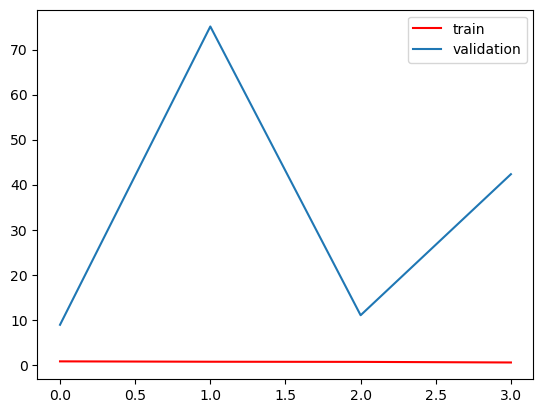

In [11]:
# checking the loss
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],label='validation')
plt.legend()
plt.show()

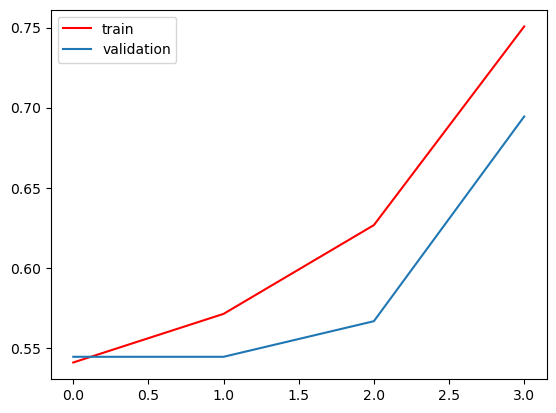

In [12]:
# checking the accuracy
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],label='validation')
plt.legend()
plt.show()

In [19]:
for i in range(4):
    print('The accuracy of epoch',i,'is',history.history['accuracy'][i])
print()
print('final accuracy of training data is  ',history.history['accuracy'][3])

The accuracy of epoch 0 is 0.5408970713615417
The accuracy of epoch 1 is 0.5712401270866394
The accuracy of epoch 2 is 0.6266490817070007
The accuracy of epoch 3 is 0.7506596446037292

final accuracy of training data is   0.7506596446037292


In [20]:
for i in range(4):
    print('The accuracy of epoch',i,'is',history.history['val_accuracy'][i])
print()
print('final accuracy of testing data is ',history.history['val_accuracy'][3])

The accuracy of epoch 0 is 0.5444444417953491
The accuracy of epoch 1 is 0.5444444417953491
The accuracy of epoch 2 is 0.5666666626930237
The accuracy of epoch 3 is 0.6944444179534912

final accuracy of testing data is  0.6944444179534912
